# Rechnen mit Wahrscheinlichkeiten
In diesem Notebook möchten wir uns mit einem Problem befassen, das häufig in der Praxis auftritt wenn wir mit Wahrscheinlichkeiten rechnen: Die Werte werden sehr sehr klein, und häufig sogar zu klein.
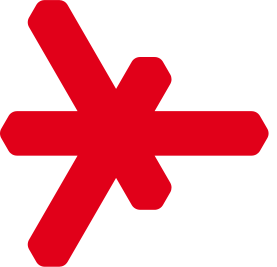

## 1. Vorbereitung

Wir bleiben bei dem Fabrikbeispiel aus dem letzten Notebook. Kopieren Sie zunächst Ihre Implementierung von *binomial_recursive()* aus dem letzten Notebook in die folgende Zelle und führen Sie die Zelle aus (der Plot sollte eine korrekte Binomialverteilung zeigen).

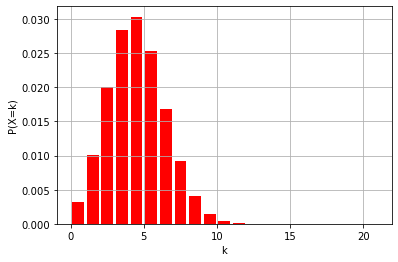

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom


def binomial_recursive(n, p):
    # calc k = 0
    P = []
    x = binom(n, 0) * pow(p, 0) * pow((1-p),n)
    P.append(x)
    for k in range(1,n+1):
        x *= (p/(1-p)) * ((n-k)/(k+1))
        P.append(x)
    return np.array(P)

def barplot(P):
    ind = np.arange(0,len(P))
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind+0.5, P, 0.8, color='red')
    ax.set_ylabel('P(X=k)')
    ax.set_xlabel('k')
    plt.grid(True)
    plt.show()
 
# Einfacher Test
barplot(binomial_recursive(20, 0.25))

## 2. Kleine kleine Werte ....

Die Ausschussrate sei nun $p=10$\%. Wir berechnen $P(X=1000)$, d.h. die Wahrscheinlichkeit dass 1000 Teile defekt sind.

Wir erhalten den Wert $P(X=1000)=0$. Das ist offensichtlich falsch, denn eigentlich sollte der Wert ungefähr $1,33$\% betragen.

Können Sie das Problem im Detail erklären? Studieren Sie hierzu das Array $P$. 

In [3]:
P = binomial_recursive(10000, 0.1)
print(P[1000]) # ???

0.0


Werte sind zu klein und werden deshalb auf 0 "gerundet"

## 3. Rechnen mit kleinen kleinen Werten

Eine typische Strategie, um auch mit kleinen Zahlen erfolgreich zu rechnen, ist die Verwendung des Logarithmus. Implementieren Sie eine Methode **binomial_log()**, die zunächst *nicht* die Einzelwahrscheinlichkeiten $P$
$$
  P := P(X=0), P(X=1), P(X=2), ...
$$
sondern die zugehörigen Logarithmen $logP$ berechnet:
$$
 logP := log \big( P(X=0) \big) , log \big( P(X=1) \big) , log \big( P(X=2) \big) , ...
$$
1. Verwenden Sie hierzu die rekursive Formel und passen Sie diese auf Logarithmen an. Nutzen Sie hierbei insbesondere, dass $log(a \cdot b) = log(a) + log(b)$.
2. Berechnen Sie das gesuchte Array P, indem Sie auf die Werte in logP die Exponentialfunktion anwenden. 

Nun sollte das Fabrikbeispiel funktionieren.

In [17]:
from numpy import log
import math
def binomial_log(n, p):
# calc k = 0
    P = []
    # n über 0 und p hoch 0 fallen direkt weg
    x = n * log(1-p)
    P.append(x)
    for k in range(1,n+1):
        # x *= (p/(1-p)) * ((n-k)/(k+1))
        x *= log(p) - log(1-p) + log(n-k) - log(k+1)
        P.append(math.exp(x))
    return np.array(P)

# Klappt :-) ?
P = binomial_log(10000, 0.1)
print(P[1000])

1.0


<ipython-input-17-7db7d4fcc02b>:11: RuntimeWarning: divide by zero encountered in log
  x *= log(p) - log(1-p) + log(n-k) - log(k+1)
<ipython-input-17-7db7d4fcc02b>:11: RuntimeWarning: invalid value encountered in double_scalars
  x *= log(p) - log(1-p) + log(n-k) - log(k+1)
